In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('wiki.csv')
df

,program,profile,size,process
0,rust,RDFS,10000,0.014048
1,rust,RDFS,10000,0.012539
2,rust,RDFS,10000,0.011235
3,rust,RDFS,10000,0.011739
4,rust,RDFS,10000,0.011947
5,rust,RHODF,10000,0.005161
6,rust,RHODF,10000,0.005424
7,rust,RHODF,10000,0.004950
8,rust,RHODF,10000,0.005308
9,rust,RHODF,10000,0.005473


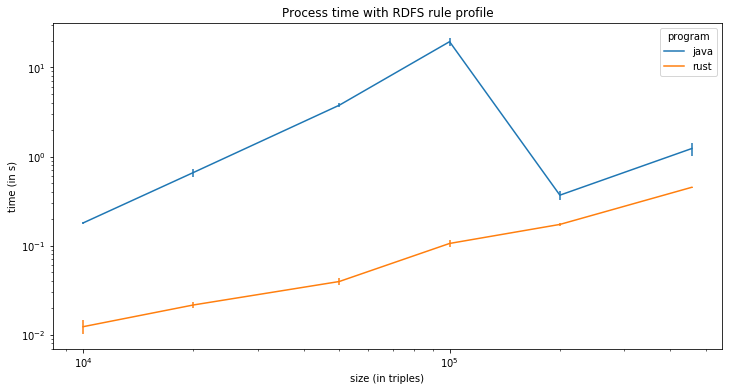

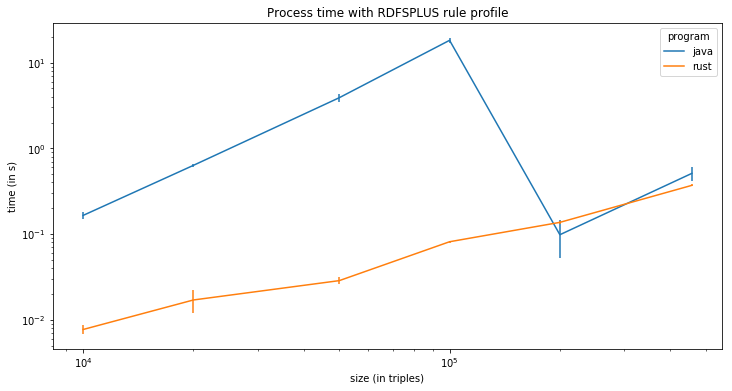

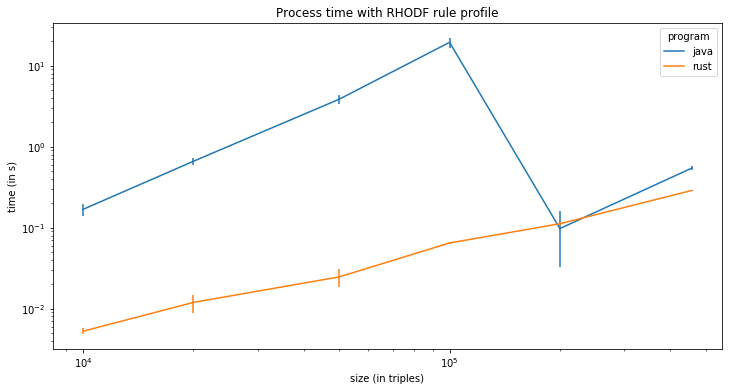

In [3]:
profiles = list(set(df['profile']))
for profile in profiles:
    data = df[df['profile']==profile].groupby(['program','size'])
    means = data['process'].mean().unstack().transpose()
    stdev = data['process'].std().unstack().transpose()
    ax = means.plot(yerr=2*stdev,title='Process time with {} rule profile'.format(profile),loglog=True,figsize=(12,6))
    ax.set_ylabel('time (in s)')
    ax.set_xlabel('size (in triples)')
    ax.get_figure().savefig("wiki_{}.png".format(profile))
    ax